In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
a= "\\Users\\noopu\\Downloads\\Data.csv"
df=pd.read_csv(a)
df.head()

,Timestamp,station,PM2.5,PM10,address,city,latitude,longitude,state
0,2017-01-01,"32Bungalows, Bhilai - CECB",NaN,NaN,"Bhilai RO Office, 5, 32 Bungalows, Bhilai, Dis...",Bhilai,21.194815,81.314770,Chhattisgarh
1,2017-01-01,"AIIMS, Raipur - CECB",NaN,NaN,"All India Institute Of Medical Science, Gate N...",Raipur,21.258815,81.578979,Chhattisgarh
2,2017-01-01,"Adarsh Nagar, Jaipur - RSPCB",NaN,NaN,"Psychiatric Centre, Janta Colony, Govind Marg,...",Jaipur,26.902909,75.836858,Rajasthan
3,2017-01-01,"Airoli, Navi Mumbai - MPCB",NaN,54.743723,NaN,Navi Mumbai,19.149400,72.998600,Maharashtra
4,2017-01-01,"Airport Area, Indore - IMC",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
b="\\Users\\noopu\\Downloads\\NCAP_Funding.csv"
NCAP_Funding=pd.read_csv(b)
NCAP_Funding.head()

,S. No.,State,City,Amount released during FY 2019-20,Amount released during FY 2020-21,Amount released during FY 2021-22,Total fund released,Utilisation as on June 2022
0,1,Andhra Pradesh,Vijaywada,6,-,-,6.00,22.91
1,2,Andhra Pradesh,Guntur,0.12,0.76,1.96,2.84,22.91
2,3,Andhra Pradesh,Kurnool,0.06,0.76,1.36,2.18,22.91
3,4,Andhra Pradesh,Nellore,0.06,0.76,1.92,2.74,22.91
4,5,Andhra Pradesh,Visakhapatnam,0.12,-,-,0.12,22.91


In [8]:
c="\\Users\\noopu\\Downloads\\State_data.csv"
State_data=pd.read_csv(c)
State_data.head()

,State,Population,Area (km2)
0,Uttar Pradesh,199812341,240928
1,Maharashtra,112374333,307713
2,Bihar,104099452,94163
3,West Bengal,91276115,88752
4,Madhya Pradesh,72626809,308252


In [9]:
#11
state_avg_pm25 = df.groupby('state')['PM2.5'].mean()
highest_state = state_avg_pm25.idxmax()
highest_value = state_avg_pm25.max()
state_avg_pm25
print(highest_state,highest_value)

Delhi 104.1009176780069


In [10]:
#12
df["Timestamp"] = pd.to_datetime(df["Timestamp"])
df_2023 = df[df["Timestamp"].dt.year == 2023]

# Filter for PM2.5 values above 300 µg/m³
hazardous_df = df_2023[df_2023["PM2.5"] > 300]

# Count unique days per state where PM2.5 > 300
hazardous_df = hazardous_df.copy()  # Create an explicit copy to avoid warnings
hazardous_df.loc[:, "Date"] = hazardous_df["Timestamp"].dt.date
state_hazardous_days = hazardous_df.groupby("state")["Date"].nunique()

# Find the state with the most hazardous days
most_hazardous_state = state_hazardous_days.idxmax()
max_days = state_hazardous_days.max()

most_hazardous_state, max_days

('Delhi', np.int64(49))

In [11]:
#13
# Filter data for the year 2023
df_2023 = df[df["Timestamp"].dt.year == 2023]

# Drop rows with missing PM2.5 values
df_2023 = df_2023.dropna(subset=["PM2.5"])

# Compute the standard deviation of PM2.5 for each station within each state
station_variability = df_2023.groupby(["state", "station"])["PM2.5"].std()

# Compute the average standard deviation for each state
state_variability = df_2023.groupby("state")["PM2.5"].std()

# Find the state with the highest average standard deviation
most_variable_state = state_variability.idxmax()
max_variability = state_variability.max()

most_variable_state, max_variability


('Delhi', np.float64(82.79710576209911))

In [12]:
#14
df_2023 = df[df["Timestamp"].dt.year == 2021|2020]
state_less_avg_pm25 = df_2023.groupby('state')['PM2.5'].mean()
less_pm_state = state_less_avg_pm25.idxmin()
less_pm_state

'Meghalaya'

In [13]:
#21
df_aug = df[(df["Timestamp"].dt.year == 2020) & (df["Timestamp"].dt.month == 8)]
max_station = df_aug.loc[df_aug["PM2.5"].idxmax(), "station"]
max_station

'Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB'

In [14]:
#22
df_2018 = df[df["Timestamp"].dt.year == 2018]

seasons = {
    "Winter": [12, 1, 2],
    "Summer": [3, 4, 5],
    "Monsoon": [6, 7, 8, 9]
}

station_filter = "Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB"
season_means = {}

for season, months in seasons.items():
    season_data = df_2018[df_2018["Timestamp"].dt.month.isin(months) & (df_2018["station"] == station_filter)]
    season_means[season] = season_data["PM2.5"].mean()  # Store mean PM2.5 for each season

highest_pollution_season = max(season_means, key=season_means.get)  # Get season with highest PM2.5

highest_pollution_season

'Winter'

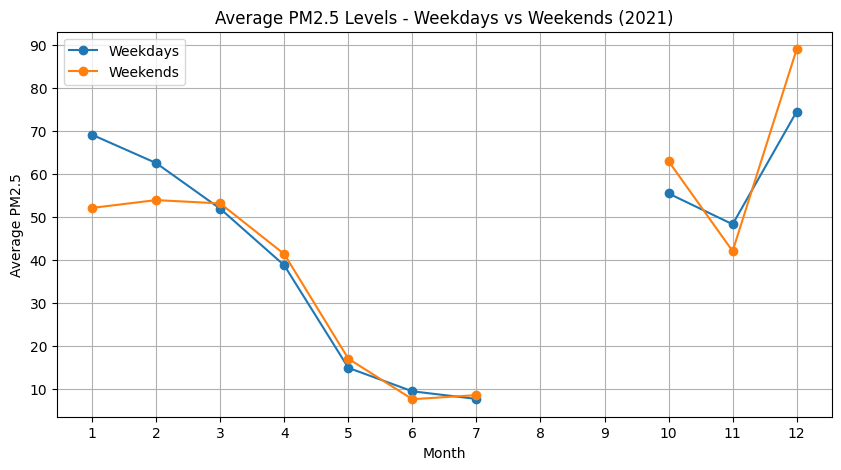

In [15]:
# #23
data_2021 = df[(df["Timestamp"].dt.year == 2021) & (df["station"] == station_filter)].copy()

# Extract weekdays and weekend info
data_2021.loc[:, "Weekday"] = data_2021["Timestamp"].dt.weekday
data_2021.loc[:, "Weekend"] = data_2021["Weekday"] >= 5

# Compute monthly average PM2.5 for weekdays and weekends
monthly_avg = data_2021.groupby([data_2021["Timestamp"].dt.month, "Weekend"])["PM2.5"].mean().unstack()

# Plot
plt.figure(figsize=(10, 5))
if False in monthly_avg.columns:
    plt.plot(monthly_avg.index, monthly_avg[False], label="Weekdays", marker="o")
if True in monthly_avg.columns:
    plt.plot(monthly_avg.index, monthly_avg[True], label="Weekends", marker="o")

plt.xlabel("Month")
plt.ylabel("Average PM2.5")
plt.legend()
plt.title("Average PM2.5 Levels - Weekdays vs Weekends (2021)")
plt.xticks(monthly_avg.index)  # Ensure correct month labels
plt.grid(True)
plt.show()


In [16]:
#31
data_2022 = df[df["Timestamp"].dt.year == 2022]

season_diff = {}
for state in data_2022["state"].dropna().unique():  # Ensure we don't have NaN states
    state_data = data_2022[data_2022["state"] == state]
    
    # Compute seasonal averages
    monsoon_avg = state_data[state_data["Timestamp"].dt.month.isin(seasons["Monsoon"])]["PM2.5"].mean()
    summer_avg = state_data[state_data["Timestamp"].dt.month.isin(seasons["Summer"])]["PM2.5"].mean()
    
    # Check for valid averages before calculating the percentage difference
    if pd.notna(monsoon_avg) and pd.notna(summer_avg) and summer_avg != 0:
        season_diff[state] = ((monsoon_avg - summer_avg) / summer_avg) * 100

# Check if there are any valid states before finding the max
if season_diff:
    most_diff_state = max(season_diff, key=lambda k: abs(season_diff[k]))  # Corrected key function
    print("State with most difference in PM2.5 (2022):", most_diff_state)
else:
    print("No valid PM2.5 data available for comparison.")



State with most difference in PM2.5 (2022): Assam


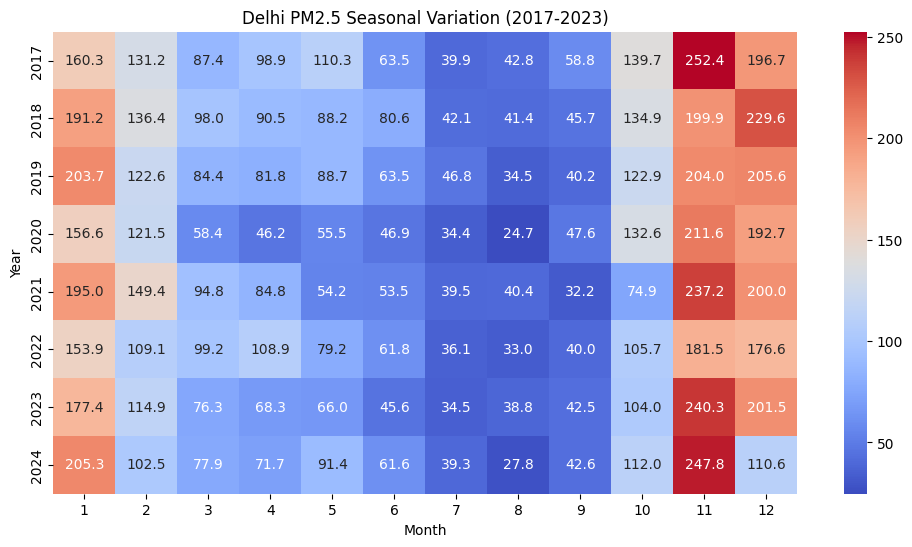

In [17]:
#32
delhi_data = df[(df["state"] == "Delhi") & (df["Timestamp"].dt.year >= 2017)]
seasonal_avg = delhi_data.groupby([df["Timestamp"].dt.year, df["Timestamp"].dt.month])["PM2.5"].mean().unstack()

plt.figure(figsize=(12, 6))
sns.heatmap(seasonal_avg, cmap="coolwarm", annot=True, fmt=".1f")
plt.xlabel("Month")
plt.ylabel("Year")
plt.title("Delhi PM2.5 Seasonal Variation (2017-2023)")
plt.show()


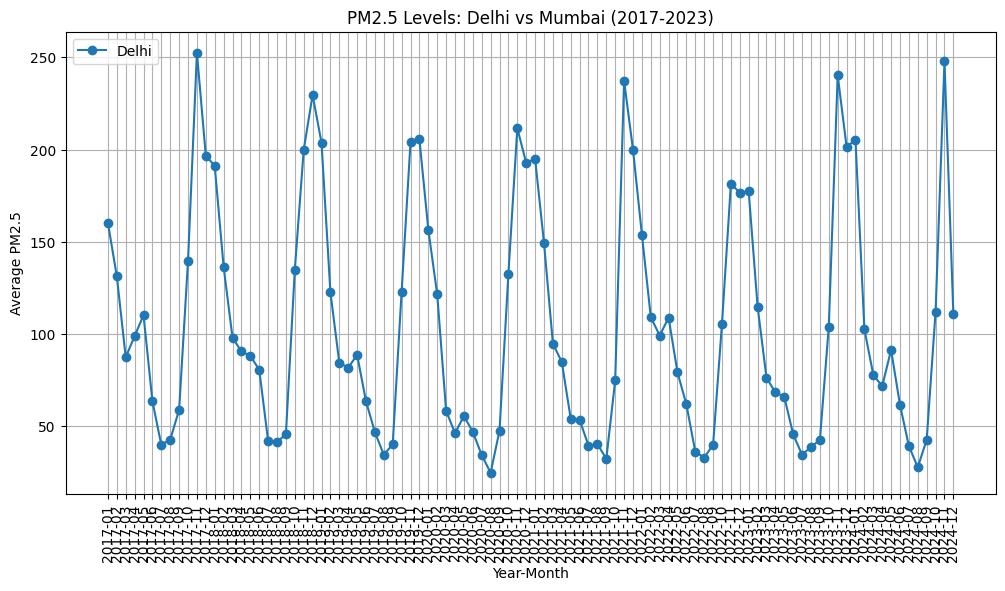

In [18]:
#33
cities_data = df[(df["state"].isin(["Delhi", "Mumbai"])) & (df["Timestamp"].dt.year >= 2017)].copy()

# Compute monthly PM2.5 averages
cities_avg = cities_data.groupby([cities_data["Timestamp"].dt.to_period("M"), "state"])["PM2.5"].mean().unstack()

# Convert PeriodIndex to string for plotting
cities_avg.index = cities_avg.index.astype(str)

# Plot
plt.figure(figsize=(12, 6))
if "Delhi" in cities_avg.columns:
    plt.plot(cities_avg.index, cities_avg["Delhi"], label="Delhi", marker="o")
if "Mumbai" in cities_avg.columns:
    plt.plot(cities_avg.index, cities_avg["Mumbai"], label="Mumbai", marker="o")

plt.xlabel("Year-Month")
plt.ylabel("Average PM2.5")
plt.legend()
plt.title("PM2.5 Levels: Delhi vs Mumbai (2017-2023)")
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.grid(True)
plt.show()


In [19]:
#41
stations_per_state = df.groupby("state")["station"].nunique()
stations_per_state = stations_per_state.reset_index()
stations_per_state.rename(columns={"state": "State"}, inplace=True)
merged_df = pd.merge(stations_per_state, State_data, on="State")
merged_df["Pop_per_Station"] = merged_df["Population"] / merged_df["station"]
min_state = merged_df.loc[merged_df["Pop_per_Station"].idxmin()]
min_state["State"]

'Chandigarh'

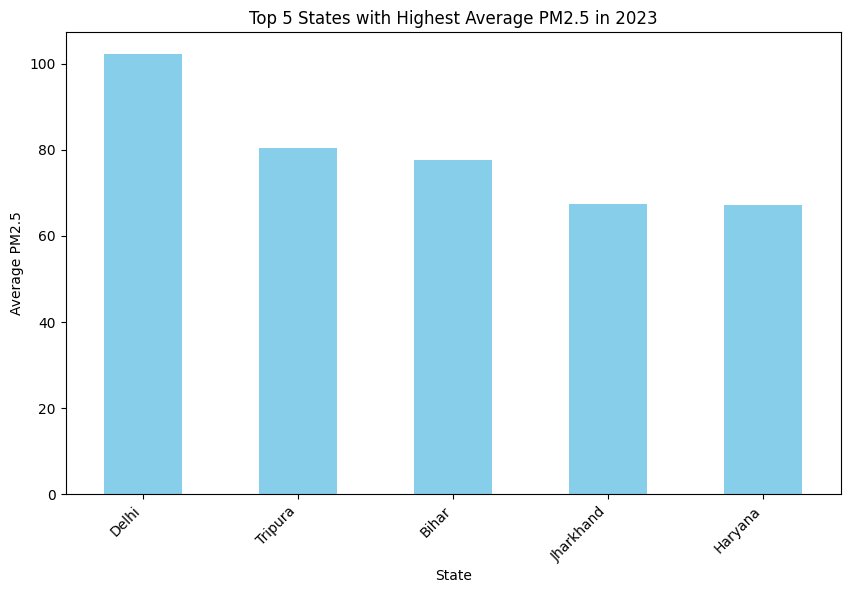

In [20]:
#42
df["Timestamp"] = pd.to_datetime(df["Timestamp"])
df_2023 = df[df["Timestamp"].dt.year == 2023]
state_avg2023_pm25 = df_2023.groupby('state')['PM2.5'].mean()
top5_states_pm25 = state_avg2023_pm25.nlargest(5)


top5_states_pm25.plot(kind='bar', color='skyblue', figsize=(10,6))

# Adding labels and title
plt.xlabel('State')
plt.ylabel('Average PM2.5')
plt.title('Top 5 States with Highest Average PM2.5 in 2023')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility

# Show the plot
#plt.tight_layout()
plt.show()

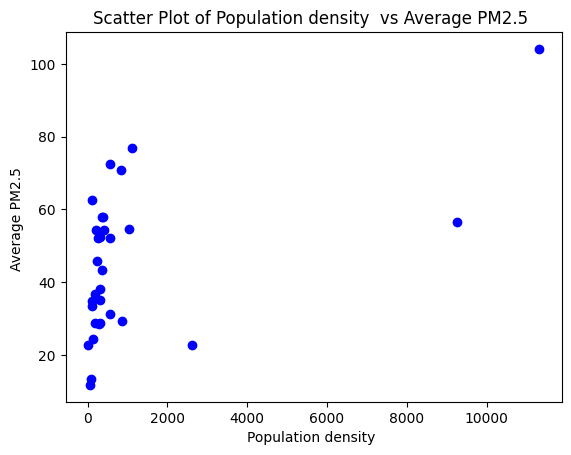

In [21]:
#43
state_avg_pm25 = df.groupby('state')['PM2.5'].mean()
state_avg_pm25=state_avg_pm25.reset_index()
state_avg_pm25.rename(columns={"state": "State"}, inplace=True)
merge_df=pd.merge(state_avg_pm25 , State_data, on="State")
merge_df['pop_density']=merge_df['Population']/merge_df['Area (km2)']
plt.scatter(merge_df['pop_density'],merge_df['PM2.5'], color='blue')

# Adding labels and title
plt.xlabel('Population density ')
plt.ylabel('Average PM2.5 ')
plt.title('Scatter Plot of Population density  vs Average PM2.5 ')

# Show the plot
plt.show()

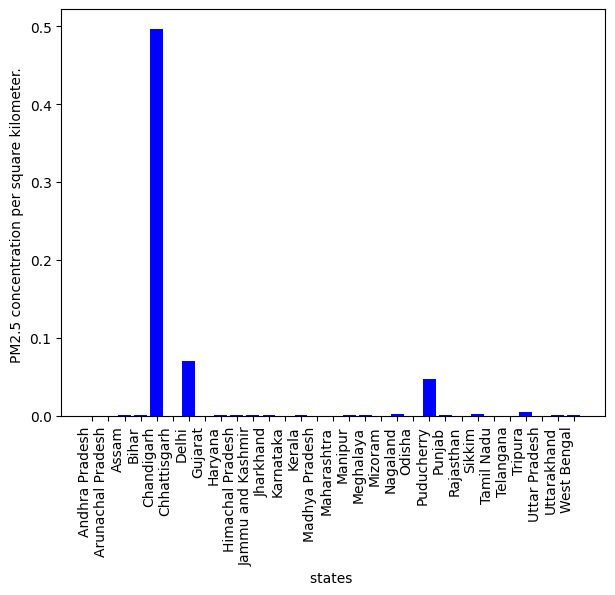

In [22]:
#51
state_avg_pm25 = df.groupby('state')['PM2.5'].mean()
state_avg_pm25=state_avg_pm25.reset_index()
state_avg_pm25.rename(columns={"state": "State"}, inplace=True)
merge_df['PM2.5_perkm2']=merge_df['PM2.5']/merge_df['Area (km2)']

plt.bar(merge_df['State'],merge_df['PM2.5_perkm2'], color='blue')
plt.xlabel('states ')
plt.ylabel('PM2.5 concentration per square kilometer. ')
plt.tight_layout()
plt.xticks(rotation=90, ha='right')
plt.show()

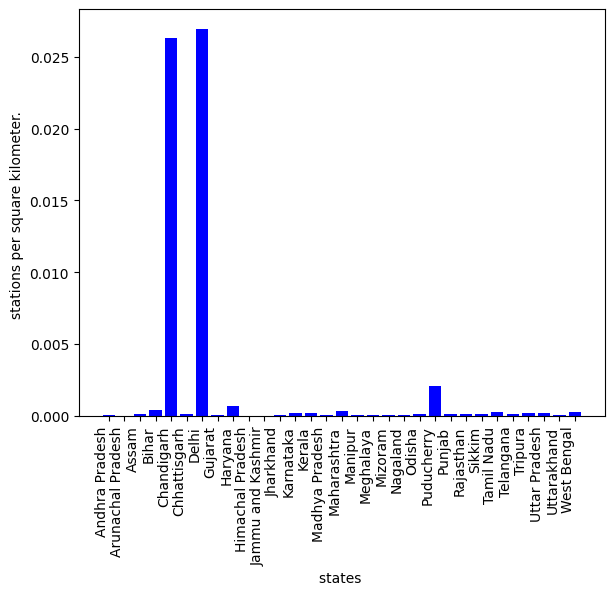

In [23]:
#52
stations_per_state = df.groupby("state")["station"].nunique()
stations_per_state = stations_per_state.reset_index()
stations_per_state.rename(columns={"state": "State"}, inplace=True)
merged_df = pd.merge(stations_per_state, State_data, on="State")
merged_df['stations_km2']=merged_df['station']/merge_df['Area (km2)']
plt.bar(merged_df['State'],merged_df['stations_km2'], color='blue')
plt.xlabel('states ')
plt.ylabel('stations per square kilometer. ')
plt.tight_layout()
plt.xticks(rotation=90, ha='right')
plt.show()

In [24]:
#53
df["Timestamp"] = pd.to_datetime(df["Timestamp"])
df_2021 = df[df["Timestamp"].dt.year == 2021]
state_avg2021_pm25 = df_2021.groupby('state')['PM2.5'].mean()
state_avg2021_pm25 = state_avg2021_pm25.reset_index()
state_avg2021_pm25.rename(columns={"state": "State"}, inplace=True)
merged_df = pd.merge(state_avg2021_pm25, State_data, on="State")
merged_df['pop_density']= merged_df['Population']/merged_df['Area (km2)']
filtered_df = merged_df[merged_df['State'].isin(['Maharashtra','Madhya Pradesh'])]
filtered_df


,State,PM2.5,Population,Area (km2),pop_density
14,Madhya Pradesh,47.095952,72626809,308252,235.608557
15,Maharashtra,46.440044,112374333,307713,365.192023


Population density appears to correlate with pollution to some extent, but the slightly higher PM2.5 in Madhya Pradesh despite a lower population density suggests other factors are at play, such as industrialization, urbanization, or geographical factors like air circulation and topography.


In [25]:
#61
data_2021 = df[df["Timestamp"].dt.year == 2021].copy()

# Rename "state" column to "State"
data_2021.rename(columns={"state": "State"}, inplace=True)

# Ensure NCAP_Funding['State'] exists and has valid values
funded_states = set(NCAP_Funding['State'].dropna().unique())  # Remove NaN and convert to set for faster lookup

# Mark states as "Funded" or "Non-Funded"
data_2021['Funded'] = data_2021['State'].apply(lambda x: 'Funded' if x in funded_states else 'Non-Funded')

# Calculate average PM2.5 for both groups, handling missing values
avg_pm25_funding = data_2021.groupby('Funded')['PM2.5'].mean().dropna()
avg_pm25_funding

Funded
Funded        62.055055
Non-Funded    60.326211
Name: PM2.5, dtype: float64

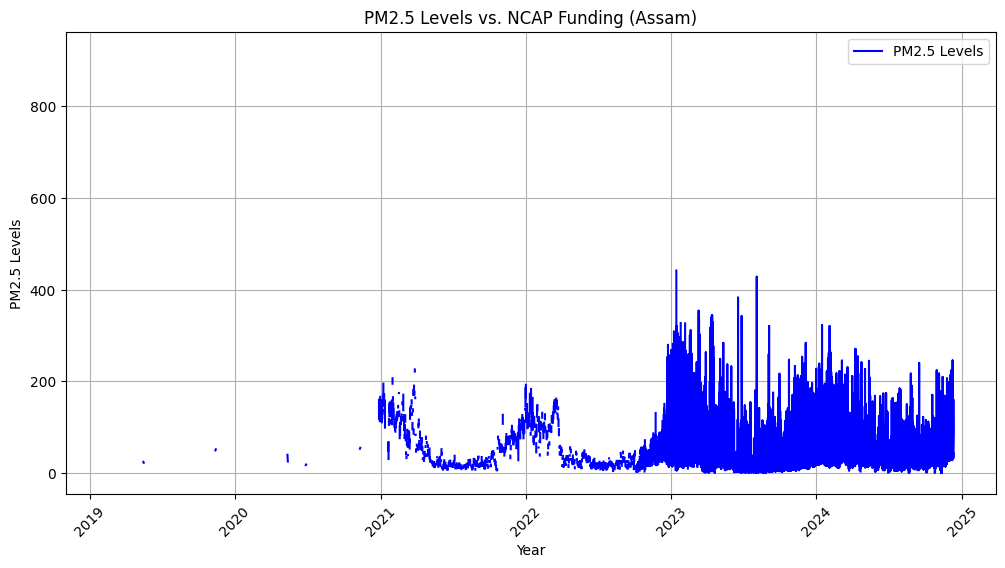

In [26]:
#62
assam_data = df[df["state"] == "Assam"].copy()
assam_data.rename(columns={"state": "State", "city": "City"}, inplace=True)

# Clean City and State columns before merging
assam_data["City"] = assam_data["City"].str.strip()
assam_data["State"] = assam_data["State"].str.strip()

NCAP_Funding["City"] = NCAP_Funding["City"].str.strip()
NCAP_Funding["State"] = NCAP_Funding["State"].str.strip()

# Filter NCAP funding data for Assam
assam_funding = NCAP_Funding[NCAP_Funding["State"] == "Assam"]

# Merge datasets
merged_assam = assam_data.merge(assam_funding, on=["City", "State"], how="left")

# Convert Timestamp to datetime and sort for proper time-series plotting
merged_assam["Timestamp"] = pd.to_datetime(merged_assam["Timestamp"])
merged_assam.sort_values("Timestamp", inplace=True)

# Plot time series of PM2.5 levels
plt.figure(figsize=(12, 6))
plt.plot(merged_assam["Timestamp"], merged_assam["PM2.5"], label="PM2.5 Levels", color="blue")
plt.xlabel("Year")
plt.ylabel("PM2.5 Levels")
plt.title("PM2.5 Levels vs. NCAP Funding (Assam)")
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()


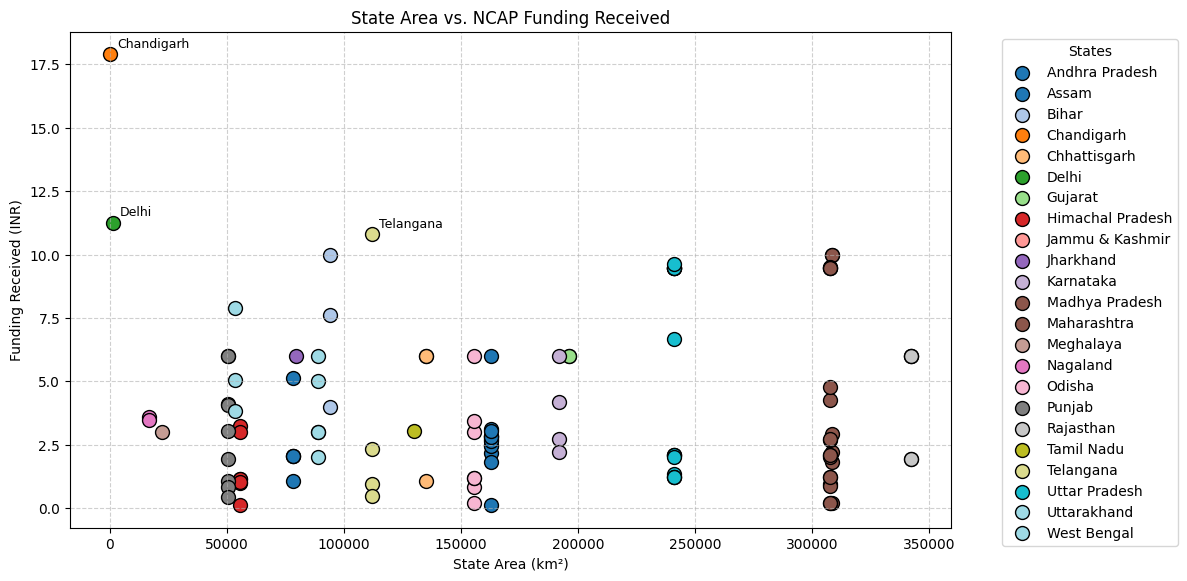

In [27]:
#63
merged_data = NCAP_Funding.merge(State_data, on="State", how="left")
# Assign a unique color to each state
states = merged_data["State"].unique()
num_states = len(states)
colors = plt.cm.tab20(np.linspace(0, 1, num_states))  # Use tab20 colormap for distinct colors

# Create a color mapping for states
state_color_map = {state: colors[i] for i, state in enumerate(states)}

# Plot scatter plot
plt.figure(figsize=(12, 6))

for state in states:
    state_data = merged_data[merged_data["State"] == state]
    plt.scatter(
        state_data["Area (km2)"], state_data["Total fund released"], 
        color=state_color_map[state], label=state, s=100, edgecolors='black'
    )
plt.xlabel("State Area (km²)")
plt.ylabel("Funding Received (INR)")
plt.title("State Area vs. NCAP Funding Received")
# Move legend outside the plot
plt.legend(title="States", bbox_to_anchor=(1.05, 1), loc="upper left")

# Add annotations for states with extreme values
for _, row in merged_data.iterrows():
    if row["Total fund released"] > merged_data["Total fund released"].quantile(0.95):  # Top 5% funding
        plt.annotate(row["State"], (row["Area (km2)"], row["Total fund released"]), fontsize=9, xytext=(5,5), textcoords="offset points")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


In [28]:
#71
data_2023 = df[df["Timestamp"].dt.year == 2023]

# Identify the most polluted city in 2023
most_polluted_city = data_2023.groupby('city')['PM2.5'].mean().idxmax()

# Calculate percentage of days with PM2.5 > 300
city_data = data_2023[data_2023['city'] == most_polluted_city]
hazardous_days = (city_data['PM2.5'] > 300).sum()
total_days = city_data['PM2.5'].count()
percentage_hazardous = (hazardous_days / total_days) * 100
print(f"Percentage of hazardous days in {most_polluted_city}: {percentage_hazardous:.2f}%")

Percentage of hazardous days in Darbhanga: 23.08%


In [29]:
#72
delhi_data = df[(df['city'] == 'Delhi') & (df["Timestamp"].dt.year.between(2018, 2020))]

# Filter data for festival months
diwali_data = delhi_data[delhi_data["Timestamp"].dt.month.isin([10,11])]
new_year_data = delhi_data[delhi_data["Timestamp"].dt.month== 1]

# Calculate average PM2.5 during festivals vs. regular months
avg_festival_pm25 = pd.concat([diwali_data, new_year_data])['PM2.5'].mean()
avg_regular_pm25 = delhi_data[~delhi_data["Timestamp"].dt.month.isin([10, 11, 1])]['PM2.5'].mean()

print(f"Festival PM2.5 Levels: {avg_festival_pm25:.2f}, Regular PM2.5 Levels: {avg_regular_pm25:.2f}")

Festival PM2.5 Levels: 171.85, Regular PM2.5 Levels: 83.69


Assam


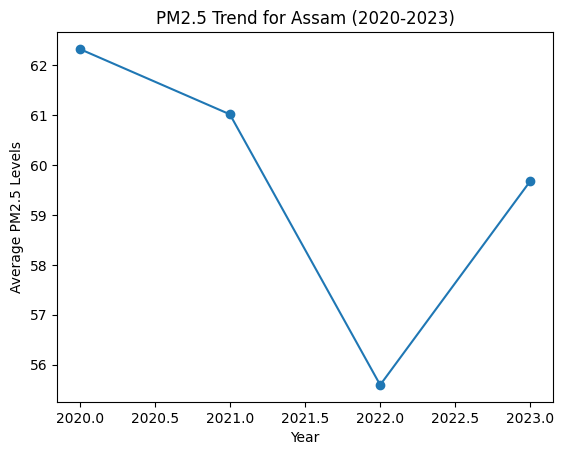

In [30]:
#73
highest_funded_state = NCAP_Funding.groupby('State')['Amount released during FY 2020-21'].sum().idxmax()
print(highest_funded_state)
# Plot PM2.5 trend from 2020 to 2023
state_data = df[(df['state'] == highest_funded_state) & (df["Timestamp"].dt.year.between(2020, 2023))]
avg_pm25_per_year = state_data.groupby(df["Timestamp"].dt.year)['PM2.5'].mean()

plt.plot(avg_pm25_per_year.index, avg_pm25_per_year.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Average PM2.5 Levels')
plt.title(f'PM2.5 Trend for {highest_funded_state} (2020-2023)')
plt.show()

In [34]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [36]:
#74
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull

# Load sensor data
df = pd.read_csv("/mnt/data/Data.csv")  # Update path if needed

# Extract sensor locations
sensor_locations = df[['latitude', 'longitude']].dropna()

# Approximate India's boundary (Simplified manually for visualization)
india_boundary = np.array([
    [68.1767, 7.9655], [97.4026, 7.9655], [97.4026, 35.5087], [68.1767, 35.5087], [68.1767, 7.9655]
])

# Compute Convex Hull for better approximation (optional)
hull = ConvexHull(sensor_locations)

# Plot India boundary manually
plt.figure(figsize=(8, 10))
plt.plot(india_boundary[:, 0], india_boundary[:, 1], 'k-', label="India Boundary")

# Plot sensor locations
plt.scatter(sensor_locations["longitude"], sensor_locations["latitude"], color='red', s=10, label="Sensor Locations")

# Overlay convex hull around sensor locations (optional for better visualization)
for simplex in hull.simplices:
    plt.plot(sensor_locations.iloc[simplex, 1], sensor_locations.iloc[simplex, 0], 'b--')

# Labels and legend
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Air Quality Monitoring Sensor Locations in India")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()



FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/Data.csv'

#74
One interesting insight that could intrigue policymakers is the relationship between the density of air quality monitoring stations and pollution levels in different regions. From the dataset, we can examine whether states with more monitoring stations tend to have higher or lower PM2.5 concentrations. This could indicate that areas with more stations may be more aware of their pollution levels, which could drive action to improve air quality. On the other hand, it could also suggest that higher pollution areas receive more attention and thus more monitoring stations.

Another intriguing observation might be to assess the funding allocated by the NCAP to states with high pollution but relatively low monitoring station density. In such cases, the effectiveness of the funding could be questioned—whether it is truly reaching areas in need of intervention, or if it’s being distributed more equally without focusing on the most polluted regions.

These insights could inform the government on how to optimize resource allocation for air quality improvement. Perhaps focusing more on states with large population densities but fewer monitoring stations would ensure that the most affected areas are getting adequate attention and support.